

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


 
### This No-show appointments dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Questions that I asked:
 <br>
-How many patients suffering with diabetes?<br>
-Which ages of patients have handcap?
-Is the Messages important to know if a patient will show up for their appointment? <br>




In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load your data and print out a few lines. 
df_hospital=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
df_hospital.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_hospital.shape

(110527, 14)

In [6]:
#Perform operations to inspect data types. 
print(df_hospital.dtypes,"\n")

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
NoShow             object
dtype: object 



In [7]:
#look for instances of missing or possibly errant data.

print(df_hospital.isnull().sum(),"\n")


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
NoShow            0
dtype: int64 



In [8]:
#check for the dublicate data.

print(df_hospital.duplicated().sum(),"\n")


0 





### Data Cleaning (Drop Rows with Missing Values)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_hospital.dropna(inplace=True)

In [10]:
print(df_hospital.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
NoShow            0
dtype: int64


### Data Cleaning (Drop Duplicates)

In [11]:
df_hospital.drop_duplicates(inplace=True)

In [12]:
print(df_hospital.duplicated().sum())

0


## #Performing Query on No Show Appointment dataset

In the code below I extracted the patients that attend & did not attend for their appointments that have recived SMS reminder for their appointments. 

In [13]:
#query to count the patients that have show up and not showed for their appointments vs Reminder recevied
Yes=df_hospital.query('SMS_received  =="1" ')
Yes_count_show_up=Yes.query(' NoShow =="Yes" ')
Yes_received=Yes_count_show_up.groupby('SMS_received').count()['NoShow']
print(Yes_received,"/n")

No_count_show_up=Yes.query('NoShow =="No" ')
Yes_not_received=No_count_show_up.groupby('SMS_received').count()['NoShow']
print(Yes_not_received,"/n")

SMS_received
1    9784
Name: NoShow, dtype: int64 /n
SMS_received
1    25698
Name: NoShow, dtype: int64 /n


In this code below.<br> I extracted the patients that attend & did not attend their appointments that have did not recived SMS reminder for their appointments. 

In [14]:
#query to count the patients that have show and not showed up for their appointments vs Reminder NOT recevied
No=df_hospital.query('SMS_received  == 0 ')
No_count_show_up=No.query(' NoShow =="Yes" ')
No_received=No_count_show_up.groupby('SMS_received').count()['NoShow']
print(No_received,"/n")

No_count_show_up=No.query('NoShow =="No"')
Yes_not_received=No_count_show_up.groupby('SMS_received').count()['NoShow']
print(Yes_not_received,"/n")

SMS_received
0    12535
Name: NoShow, dtype: int64 /n
SMS_received
0    62510
Name: NoShow, dtype: int64 /n


<a id='eda'></a>
## Exploratory Data Analysis




#### How many patients suffering with diabetes? <br>


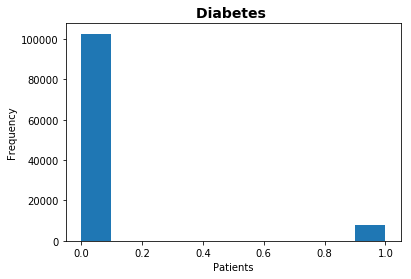

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

figure=plt.figure()
ax=figure.add_subplot(111)
ax.set_title("Diabetes ",fontweight='bold',fontsize=14)
ax.set_xlabel('Patients')
df_hospital['Diabetes'].plot(kind='hist');

The histogram chart above describe the numbers of patients that have diabetes .<br>
As shown in the graph, the patients that have suffer from diabtes is approximately reached to 10,000
the chart is visulazie that most of patients doesn't suffer from the diabetes. 

#### Which ages of patients have handcap?

Text(0.5,1,'Ages of Handcap Patients')

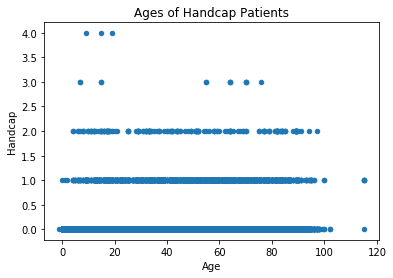

In [62]:
df_hospital.plot(x='Age',y='Handcap',kind='scatter');
plt.title('Ages of Handcap Patients')

The scatter chart represents patient ages that have handcap.
as shown in graph, mostly patients have handcap is between 20 to 90 ages.

### Is the Messages important to know if a patient will show up for their appointment? for No-show appointments data set ?

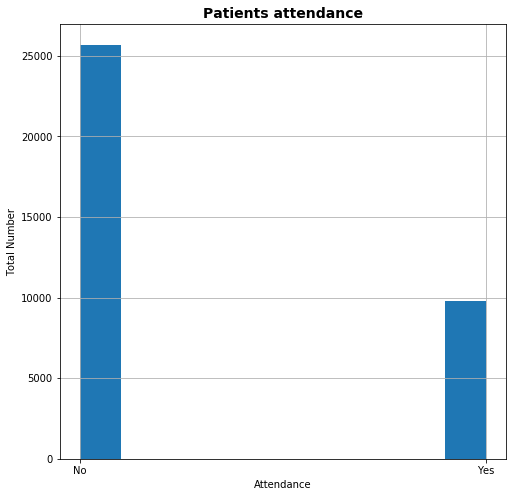

In [54]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
figure=plt.figure()
ax=figure.add_subplot(111)
ax.set_title("Patients attendance",fontweight='bold',fontsize=14)
ax.set_xlabel('Attendance')
ax.set_ylabel('Total Number')


Yes['NoShow'].hist(figsize=(8,8))

The Bar chart above describe the patients that have attend vs did not attend to their appointments when the SMS reminder is recevied by the hospital. <br>
it shows that most of patients did not attend to the hospital although the (reminder message is recevied to them).

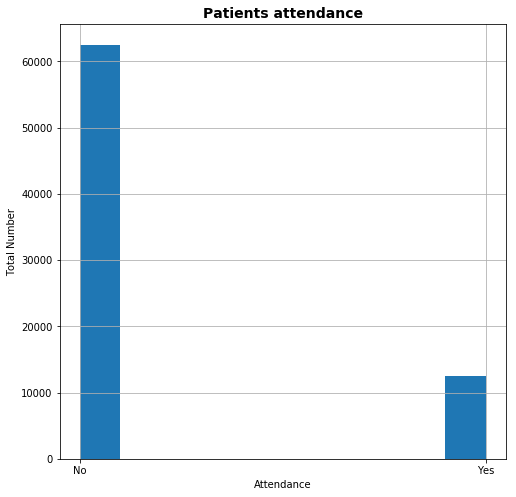

In [55]:
figure=plt.figure()
ax=figure.add_subplot(111)
ax.set_title("Patients attendance",fontweight='bold',fontsize=14)
ax.set_xlabel('Attendance')
ax.set_ylabel('Total Number')


No['NoShow'].hist(figsize=(8,8))

The Bar above describe the patients that have attend vs did not attend to their appointments when the SMS reminder is not recevied by the hospital. <br>
It shows that much bigger difference between the patients that attend vs did not attend to the hospital, It may cause that the(reminder messages did not recevied to them).

<a id='conclusions'></a>
## Conclusions

Based on the data,a few observation can be made.<br>
Receiving an SMS correlates with high risk of no-show.While this seems counter-intuitive, The importance of sending a reminder for patients for their appointments has play role , most of them did not come correlates that did not receving messages ,which cause they forgot their schduled appointments.

## Limitations and Missing Information

a few limitations of the data:
- The data set of non show appointment contain some coulmns that have markers which is hinders me for reach to the columns I want.
- The data only covers a span of three months,which is not representive sample of appointments for the whole year.


In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0